In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [2]:
def loss_own(y, x, volume, period, desv_stop=3.1, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_stop_loss, residue = loss_own_residue(y_test, x_test, period, desv_stop=desv_stop, y_short=y_short)
    return -abs(((price_input_test*volume)-(price_stop_loss*volume)))

def loss_own_residue(y, x, period, desv_stop=3.1, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price + penny
        else:
            y_test[0] = last_price - penny

        residue = mult.zscore(mult.residue(y_test, x_test, period))
        if(abs(residue[0]) >= desv_stop):
            break
    return y_test[0], residue

def gain_own(y, x, volume, period, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_take_profit, residue = gain_own_residue(y_test, x_test, period, y_short=y_short)
    return abs(((price_input_test*volume)-(price_take_profit*volume)))

def gain_own_residue(y, x, period, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price - penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] <= 0):
                break
        else:
            y_test[0] = last_price + penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] >= 0):
                break

    return y_test[0], residue

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo_adj.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-30
data: (311, 72)
pairs: (2027, 13)


In [5]:
data

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,...,SUZB3,TAEE11,TIMP3,TOTS3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-30,14.550000,21.020000,64.610001,34.799999,21.500000,23.410000,28.070000,13.97000,86.860001,42.860001,...,42.220001,29.200001,14.800000,26.120001,19.750000,8.210000,61.270000,51.130001,20.200001,68.000000
2020-07-29,15.150000,20.959999,64.629997,35.950001,22.059999,24.260000,28.240000,14.09000,87.830002,44.029999,...,41.490002,28.940001,14.890000,26.090000,19.450001,8.150000,62.950001,50.599998,20.120001,66.980003
2020-07-28,15.090000,21.520000,65.230003,35.029999,21.420000,23.520000,28.070000,14.74000,84.750000,42.919998,...,42.000000,29.070000,14.880000,25.950001,19.500000,7.990000,60.340000,50.970001,20.410000,67.190002
2020-07-27,15.280000,20.709999,66.230003,34.910000,21.580000,23.680000,28.490000,14.08000,87.709999,43.639999,...,41.669998,28.639999,14.570000,26.240000,19.389999,8.090000,61.369999,49.750000,18.910000,69.949997
2020-07-24,14.930000,20.540001,65.349998,33.950001,20.719999,22.639999,28.000000,14.00000,86.400002,41.340000,...,42.299999,28.420000,14.410000,26.360001,19.150000,7.550000,58.599998,49.270000,19.540001,66.583199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-08,17.461390,37.000000,33.200516,48.045422,29.313004,33.003910,24.464645,8.56450,38.829525,29.956003,...,41.279999,24.797062,10.600680,39.247406,21.207283,8.490177,47.735104,41.797237,4.530000,18.321693
2019-05-07,17.198299,35.279999,32.533607,47.000763,26.037483,29.394857,24.598429,8.55466,39.073124,30.347839,...,40.990002,24.496378,11.104092,40.638409,20.885221,8.371434,48.417038,41.888592,4.720000,17.858973
2019-05-06,17.597807,35.000000,32.572273,46.886795,29.048071,32.538929,25.436811,8.72182,39.268005,30.132330,...,41.330002,24.383621,11.065369,41.830807,20.748590,8.688084,48.378067,41.577965,4.560000,18.075565


In [6]:
"""y_symbol = 'ELET3'
x_symbol = 'PCAR3'"""

"""y_symbol = 'CMIG4'
x_symbol = 'ENGI11'"""

y_symbol = 'BRKM5'
x_symbol = 'LAME4'

y = data[y_symbol]
x = data[x_symbol]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


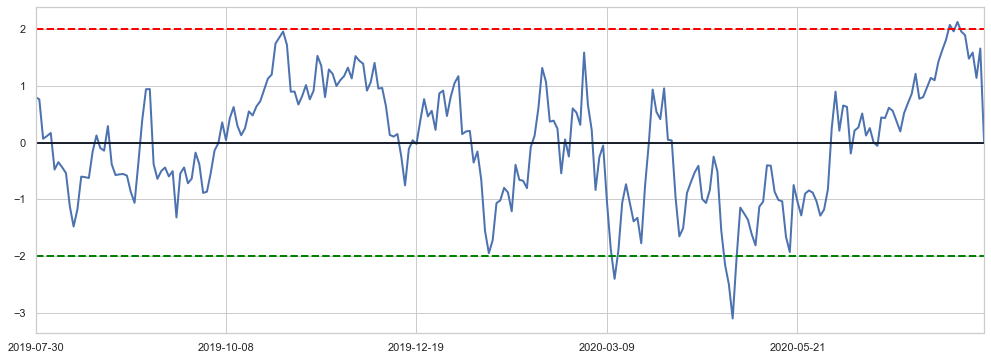

In [7]:
y_rest, resid = gain_own_residue(data['BBAS3'], data['TAEE11'], 250)
mult.plot_residue(resid)

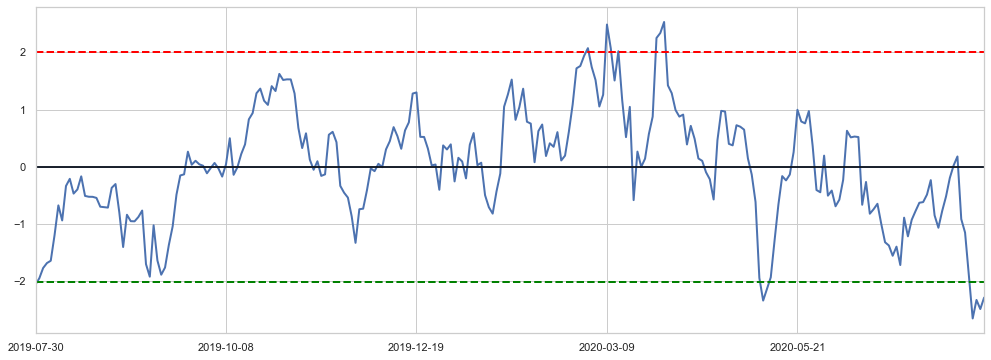

In [8]:
residues = mult.zscore(mult.residue(data['BRML3'], data['GGBR4'], 250))
mult.plot_residue(residues)

In [9]:
residues[0]

-2.28343989003074

In [10]:
mult.analysis_by_periods(data['ENBR3'], data['FLRY3'])

,Period,Stationary,Std,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Model
0,100,True,0.677016,-4.805393,99,0.447085,2,0.734343,MRLS
1,120,True,0.827436,-5.172905,99,0.519566,2,0.746716,MRLS
2,140,True,0.946147,-4.678400,99,0.555118,3,0.729819,MRLM
3,160,True,0.824203,-4.964947,99,0.558664,3,0.717090,MRLM
4,180,True,0.422722,-4.795123,99,0.573948,3,0.708528,MRLS
5,200,True,0.613988,-4.804538,99,0.560673,3,0.701953,MRLM
6,220,True,0.829289,-4.646654,99,0.544508,4,0.695580,MRLM
7,240,True,1.084429,-4.158482,99,0.517518,5,0.686745,MRLM
8,250,True,1.174538,-4.207704,99,0.505375,5,0.684112,MRLM


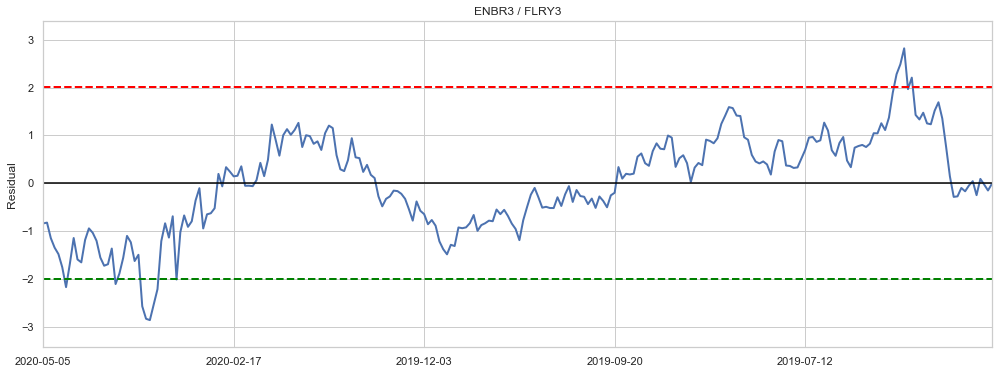

In [11]:
coint.show(data, 'ENBR3', 'FLRY3', 250)

In [12]:
#=PROJ.LIN(DESLOC(AA15;0;0;A$7;1);DESLOC(W15;0;0;A$7;2);1;0)
y, x = mult.get_values(data['ENBR3'], data['FLRY3'], 250)
new = pd.DataFrame()
new['x'] = x
new['y'] = y
#new[::-1].to_excel('datasets/rolling_beta_1.xlsx')

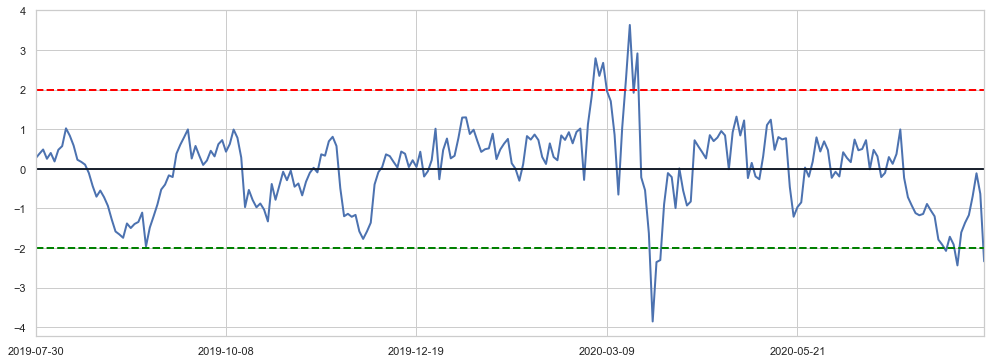

In [13]:
mult.plot_residue(mult.residue(data['ENGI11'], data['RENT3'], 250))

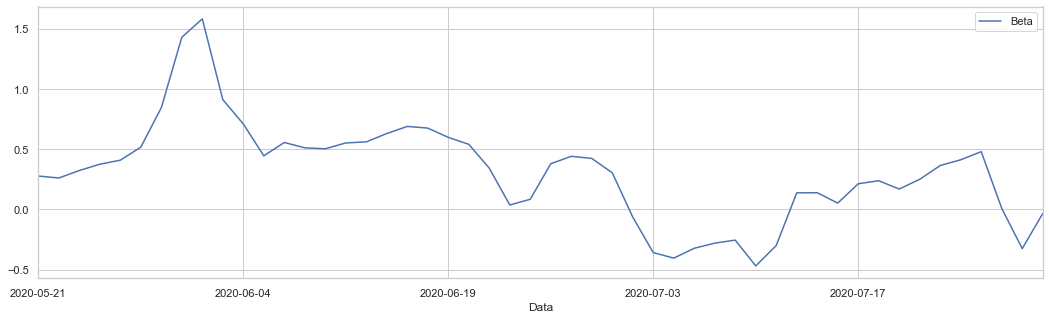

In [14]:
looping = -1
n_recored = 50
period = 10
rows=[]
test=[]
while (looping < (n_recored-1)):
    looping+=1
    dataset = data[looping:]
    y, x = mult.get_values(dataset['ENGI11'], dataset['RENT3'], period)
    #y, x = mult.returns(dataset['ENGI11'], dataset['RENT3'], period)
    #y[0]=0
    #x[0]=0
    
    coef = mult.coefficients(y, x, period)
    beta = coef['angular']
    beta = coint.beta(y, x)
    
    rows.append([dataset.index[0], beta])
    test.append([looping, y.index[0], y.index[-1], beta])

rolling_beta = pd.DataFrame(rows, columns=['Data', 'Beta'])
rolling_beta.set_index("Data", inplace = True)
rolling_beta[::-1].plot(figsize=(18, 5))
#mult.zscore(rolling_beta[::-1]).plot(figsize=(18, 5))

In [15]:
#rolling_beta

In [16]:
mult.coefficients(data['ENGI11'], data['RENT3'], 250)

{'temp': -0.001969899700550911,
 'angular': 0.6768165731215234,
 'intercept': 20.569156818126967}

In [17]:
test[0:20]

[[0, '2020-07-30', '2020-07-17', -0.034400004447999954],
 [1, '2020-07-29', '2020-07-16', -0.3258035115004345],
 [2, '2020-07-28', '2020-07-15', 0.008901423522409413],
 [3, '2020-07-27', '2020-07-14', 0.4794868823631404],
 [4, '2020-07-24', '2020-07-13', 0.4120366477388586],
 [5, '2020-07-23', '2020-07-10', 0.3644005856827146],
 [6, '2020-07-22', '2020-07-09', 0.2501275418551203],
 [7, '2020-07-21', '2020-07-08', 0.16899925630015655],
 [8, '2020-07-20', '2020-07-07', 0.23814033521686717],
 [9, '2020-07-17', '2020-07-06', 0.2130583067416576],
 [10, '2020-07-16', '2020-07-03', 0.05220012449460887],
 [11, '2020-07-15', '2020-07-02', 0.1384864020803347],
 [12, '2020-07-14', '2020-07-01', 0.13751017534248078],
 [13, '2020-07-13', '2020-06-30', -0.2995812404296583],
 [14, '2020-07-10', '2020-06-29', -0.46961430031201346],
 [15, '2020-07-09', '2020-06-26', -0.25510101106980065],
 [16, '2020-07-08', '2020-06-25', -0.2801632947470707],
 [17, '2020-07-07', '2020-06-24', -0.3228396622023624],
 [1

In [18]:
coint.beta(y, x)

0.27696843785935155

In [19]:
coint.beta(y[::-1], x[::-1])

0.2769684378593523

In [20]:
coint.beta(y[::1], x[::1])

0.27696843785935155

# BackTest

BBSE3: 28.06999969482422 / ITSA4: 10.90999984741211


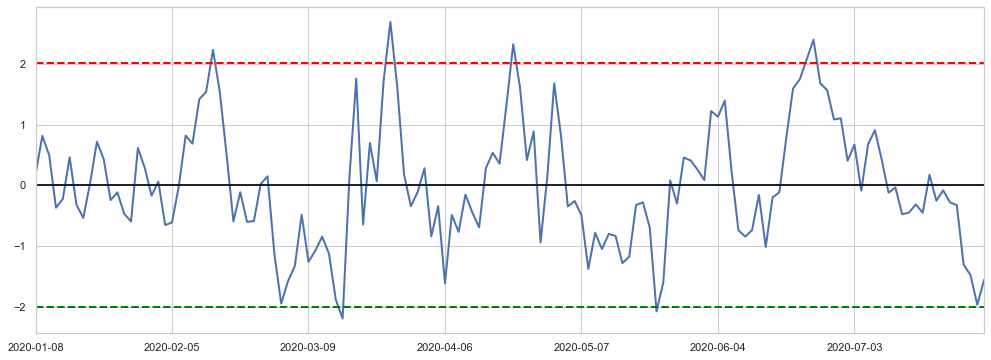

In [278]:
y_symbol = 'BBSE3'
x_symbol = 'ITSA4'
period = 140
print('{}: {} / {}: {}'.format(y_symbol, data[y_symbol][0], x_symbol, data[x_symbol][0]))
mult.plot_residue(mult.residue(data[y_symbol], data[x_symbol], period))

In [285]:
class BackTest(object):
    def __init__(self, significance=.05):
        self.counter_stoploss=0
        self.counter_takeprofit=0
        self.operation_short=0
        self.operation_long=0
        self.counter_takeprofit=0
        self.counter_oper=0
        self.counter_zerado=0
        self.day_start=None
        
        self.finance_gain=0
        self.finance_loss=0
        self.finance_zerar_loss=0
        self.finance_zerar_gain=0
        self.x_price=0
        self.y_price=0
        
    def execute(self, desv_trade=2,desv_stop=3, period=100):
        days = data.index[::-1].tolist()
        for day in days:
            test = data[data.index <= day]
            if (len(test) < period):
                continue

            if (self.day_start == None):
                self.day_start = day

            self.y_values, self.x_values = mult.get_values(test[y_symbol], test[x_symbol], period)
            resid = mult.residue(self.y_values, self.x_values, period)
            z_resid = mult.zscore(resid)
            
            check = mult.check_cointegration(self.y_values, self.x_values, period)
            if(check['is_stationary']==False):
                if(self.zerar()):
                    print('Zerado: {}'.format(day))
                continue
            
            # procura por operações
            if (self.check_trade() == False):
                # oper short/long
                if (z_resid[0] >= desv_input):
                    self.short()
                    print('Short/Long: {}'.format(day))
                    
                # oper long/short
                if (z_resid[0] <= -desv_input):
                    self.long()
                    print('Long/Short: {}'.format(day))

            # gerencia operação aberta
            if (self.check_trade()):
                if (self.operation_short):                    
                    if (z_resid[0] >= desv_stop):# check stop loss
                        self.stop()
                        print('Stop: {}'.format(day))
                    if (z_resid[0] <= 0):# check take profit
                        self.take()
                        print('Take: {}'.format(day))

                if (self.operation_long):                    
                    if (z_resid[0] <= -desv_stop):#  check stop loss
                        self.stop()
                        print('Stop: {}'.format(day))
                    if (z_resid[0] >= 0):# check take profit
                        self.take()
                        print('Take: {}'.format(day))

    def check_trade(self):
        return self.operation_short or self.operation_long
    
    def take(self):
        self.finance_gain += self.calculate()
        self.reset_oper()
        self.counter_takeprofit+=1
            
    def stop(self):
        self.finance_loss += self.calculate()
        self.reset_oper()
        self.counter_stoploss+=1
            
    def long(self):            
        self.counter_oper+=1
        self.operation_short = False
        self.operation_long = True
        self.y_price = self.y_values[0]
        self.x_price = self.x_values[0]
        
    def short(self):
        self.counter_oper+=1
        self.operation_short = True
        self.operation_long = False
        self.y_price = self.y_values[0]
        self.x_price = self.x_values[0]
        
    def reset_oper(self):
        self.operation_short = False
        self.operation_long = False
    
    def zerar(self):
        if (self.check_trade()):
            self.counter_zerado+=1
            value = self.calculate()
            if(value > 0):
                self.finance_zerar_gain += value
                self.finance_gain += value
            else:
                self.finance_zerar_loss += value
                self.finance_loss += value
                
            self.reset_oper()
            return True
        return False

    def calculate(self):
        lot = 100
        if (self.operation_long):
            long_tot = (self.y_values[0]*lot)-(self.y_price*lot)
            short_tot = (self.x_price*lot)-(self.x_values[0]*lot)
            return (long_tot+short_tot)
            
        if (self.operation_short):
            short_tot = (self.y_price*lot)-(self.y_values[0]*lot)
            long_tot = (self.x_values[0]*lot)-(self.x_price*lot)
            return (long_tot+short_tot)
        return 0

In [286]:
back = BackTest()
back.execute(period=period)
print('---------------------------')
print('Date Start: {}'.format(back.day_start))
print('counter_oper {}'.format(back.counter_oper))
print('counter_takeprofit {}'.format(back.counter_takeprofit))
print('counter_stoploss {}'.format(back.counter_stoploss))
print('counter_zerado {}'.format(back.counter_zerado))
print('---------------------------')
print('finance_loss {}'.format(back.finance_loss))
print('finance_gain {}'.format(back.finance_gain))
print('finance_zerar_gain {}'.format(back.finance_zerar_gain))
print('finance_zerar_loss {}'.format(back.finance_zerar_loss))

Long/Short: 2019-11-18
Zerado: 2019-11-19
Short/Long: 2019-12-18
Take: 2020-01-27
Long/Short: 2020-02-27
Zerado: 2020-03-12
Long/Short: 2020-05-22
Take: 2020-06-19
Long/Short: 2020-07-29
---------------------------
Date Start: 2019-11-18
counter_oper 5
counter_takeprofit 2
counter_stoploss 0
counter_zerado 2
---------------------------
finance_loss -368.55916976928665
finance_gain 471.0872650146482
finance_zerar_gain 29.485702514647983
finance_zerar_loss -368.55916976928665


Days: 2


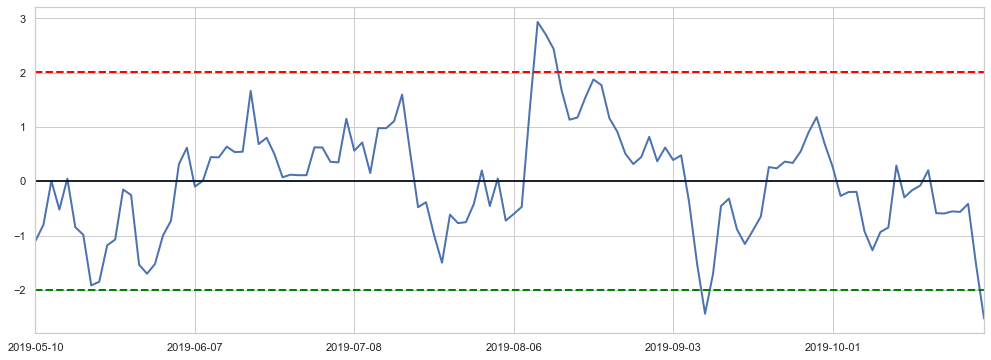

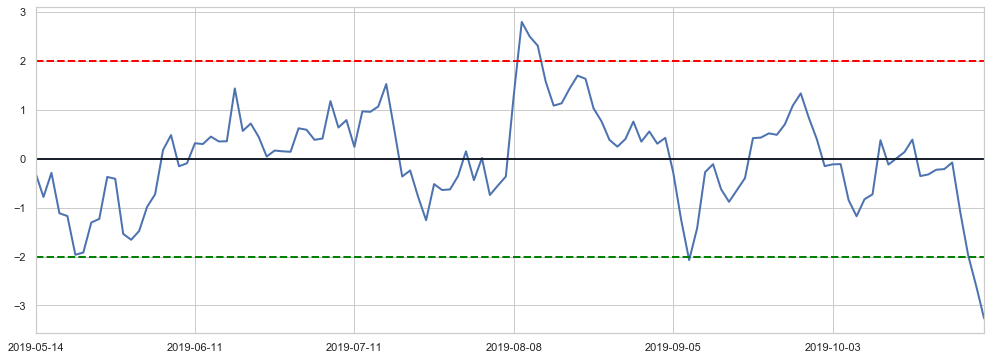

In [268]:
test = data[data.index <= '2019-10-28']
test_stop = data[data.index <= '2019-10-30']
print('Days: {}'.format(abs(len(test)-len(test_stop))))

resid = mult.residue(test[y_symbol], test[x_symbol], period)
#print(len(test))
#print('{} - {}'.format(test.index[-1], test.index[0]))
#print(mult.zscore(resid)[0])
mult.plot_residue(resid)
mult.plot_residue(mult.residue(test_stop[y_symbol], test_stop[x_symbol], period))

In [209]:
days = data.index[::-1].tolist()
first_data = None

operation_short = False
operation_long = False

counter_stoploss = 0
counter_takeprofit = 0
desv_input = 2
desv_stop = 3

for day in days:
    test = data[data.index <= day]
    if (len(test) < period):
        continue

    if (first_data == None):
        first_data = day

    resid = mult.residue(test[y_symbol], test[x_symbol], period)
    z_resid = mult.zscore(resid)
    
    # procura por operações
    if (operation_short == False and operation_long == False):
        if (z_resid[0] >= desv_input):
            operation_short = True
            operation_long = False

            desc = 'Short/Long  em {}'.format(day)
            print(desc)
        elif  (z_resid[0] <= -desv_input):
            operation_long = True
            operation_short = False

            desc = 'Long/Short  em {}'.format(day)
            print(desc)
            
    # gerencia operação aberta
    if (operation_short == True or operation_long == True):
        if (operation_short):
            # check stop loss
            if (z_resid[0] >= desv_stop):
                operation_short = False
                operation_long = False
                counter_stoploss+=1
            
            # check take profit
            if (z_resid[0] <= 0):
                operation_short = False
                operation_long = False
                counter_takeprofit+=1
        
        if (operation_long):
            #  check stop loss
            if (z_resid[0] <= -desv_stop):
                operation_short = False
                operation_long = False
                counter_stoploss+=1
            
            # check take profit
            if (z_resid[0] >= 0):
                operation_short = False
                operation_long = False
                counter_takeprofit+=1

print('---------------------------')
print('Date Start: {}'.format(first_data))
print('counter_stoploss {}'.format(counter_stoploss))
print('counter_takeprofit {}'.format(counter_takeprofit))

Long/Short  em 2019-10-28
Long/Short  em 2019-10-31
Long/Short  em 2019-11-05
Short/Long  em 2019-12-05
Long/Short  em 2020-03-02
Long/Short  em 2020-04-28
Long/Short  em 2020-05-08
Short/Long  em 2020-06-25
---------------------------
Date Start: 2019-10-18
counter_stoploss 2
counter_takeprofit 6
